# The Reactions of the German Stock Market to COVID-19 and Containment Policies: A Vector Autoregressive Analysis

## 6. Descriptive Statistics full sample

In [1]:
# Importing the necessary python packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [2]:
# Load in the previosuly prepared dataset
df = pd.read_csv("prepared_data.csv", parse_dates=["date"])

In [3]:
# Generate descriptive statistics
pd.options.display.float_format = "{:.2f}".format
df.loc[:,"hdax_open":"containment_index"].describe()

,hdax_open,hdax_close,total_cases,new_cases,stringency_index,containment_index
count,375.00,375.00,375.00,375.00,375.00,375.00
mean,7307.33,7305.40,1311234.58,7795.26,62.69,60.50
std,901.27,905.55,1378457.62,9739.94,18.62,14.83
min,4665.29,4658.54,1.00,0.00,5.56,13.10
25%,6891.51,6891.83,186606.50,715.00,56.94,57.74
50%,7298.61,7278.96,385591.00,2747.00,67.59,62.50
75%,7900.77,7901.64,2489096.50,12057.00,75.00,70.89
max,8755.37,8758.55,3753220.00,49044.00,85.19,75.12


## 7. Data Plotting and Sample Selection

In [4]:
columns = list(df.loc[:,"hdax_open":"containment_index"].columns)

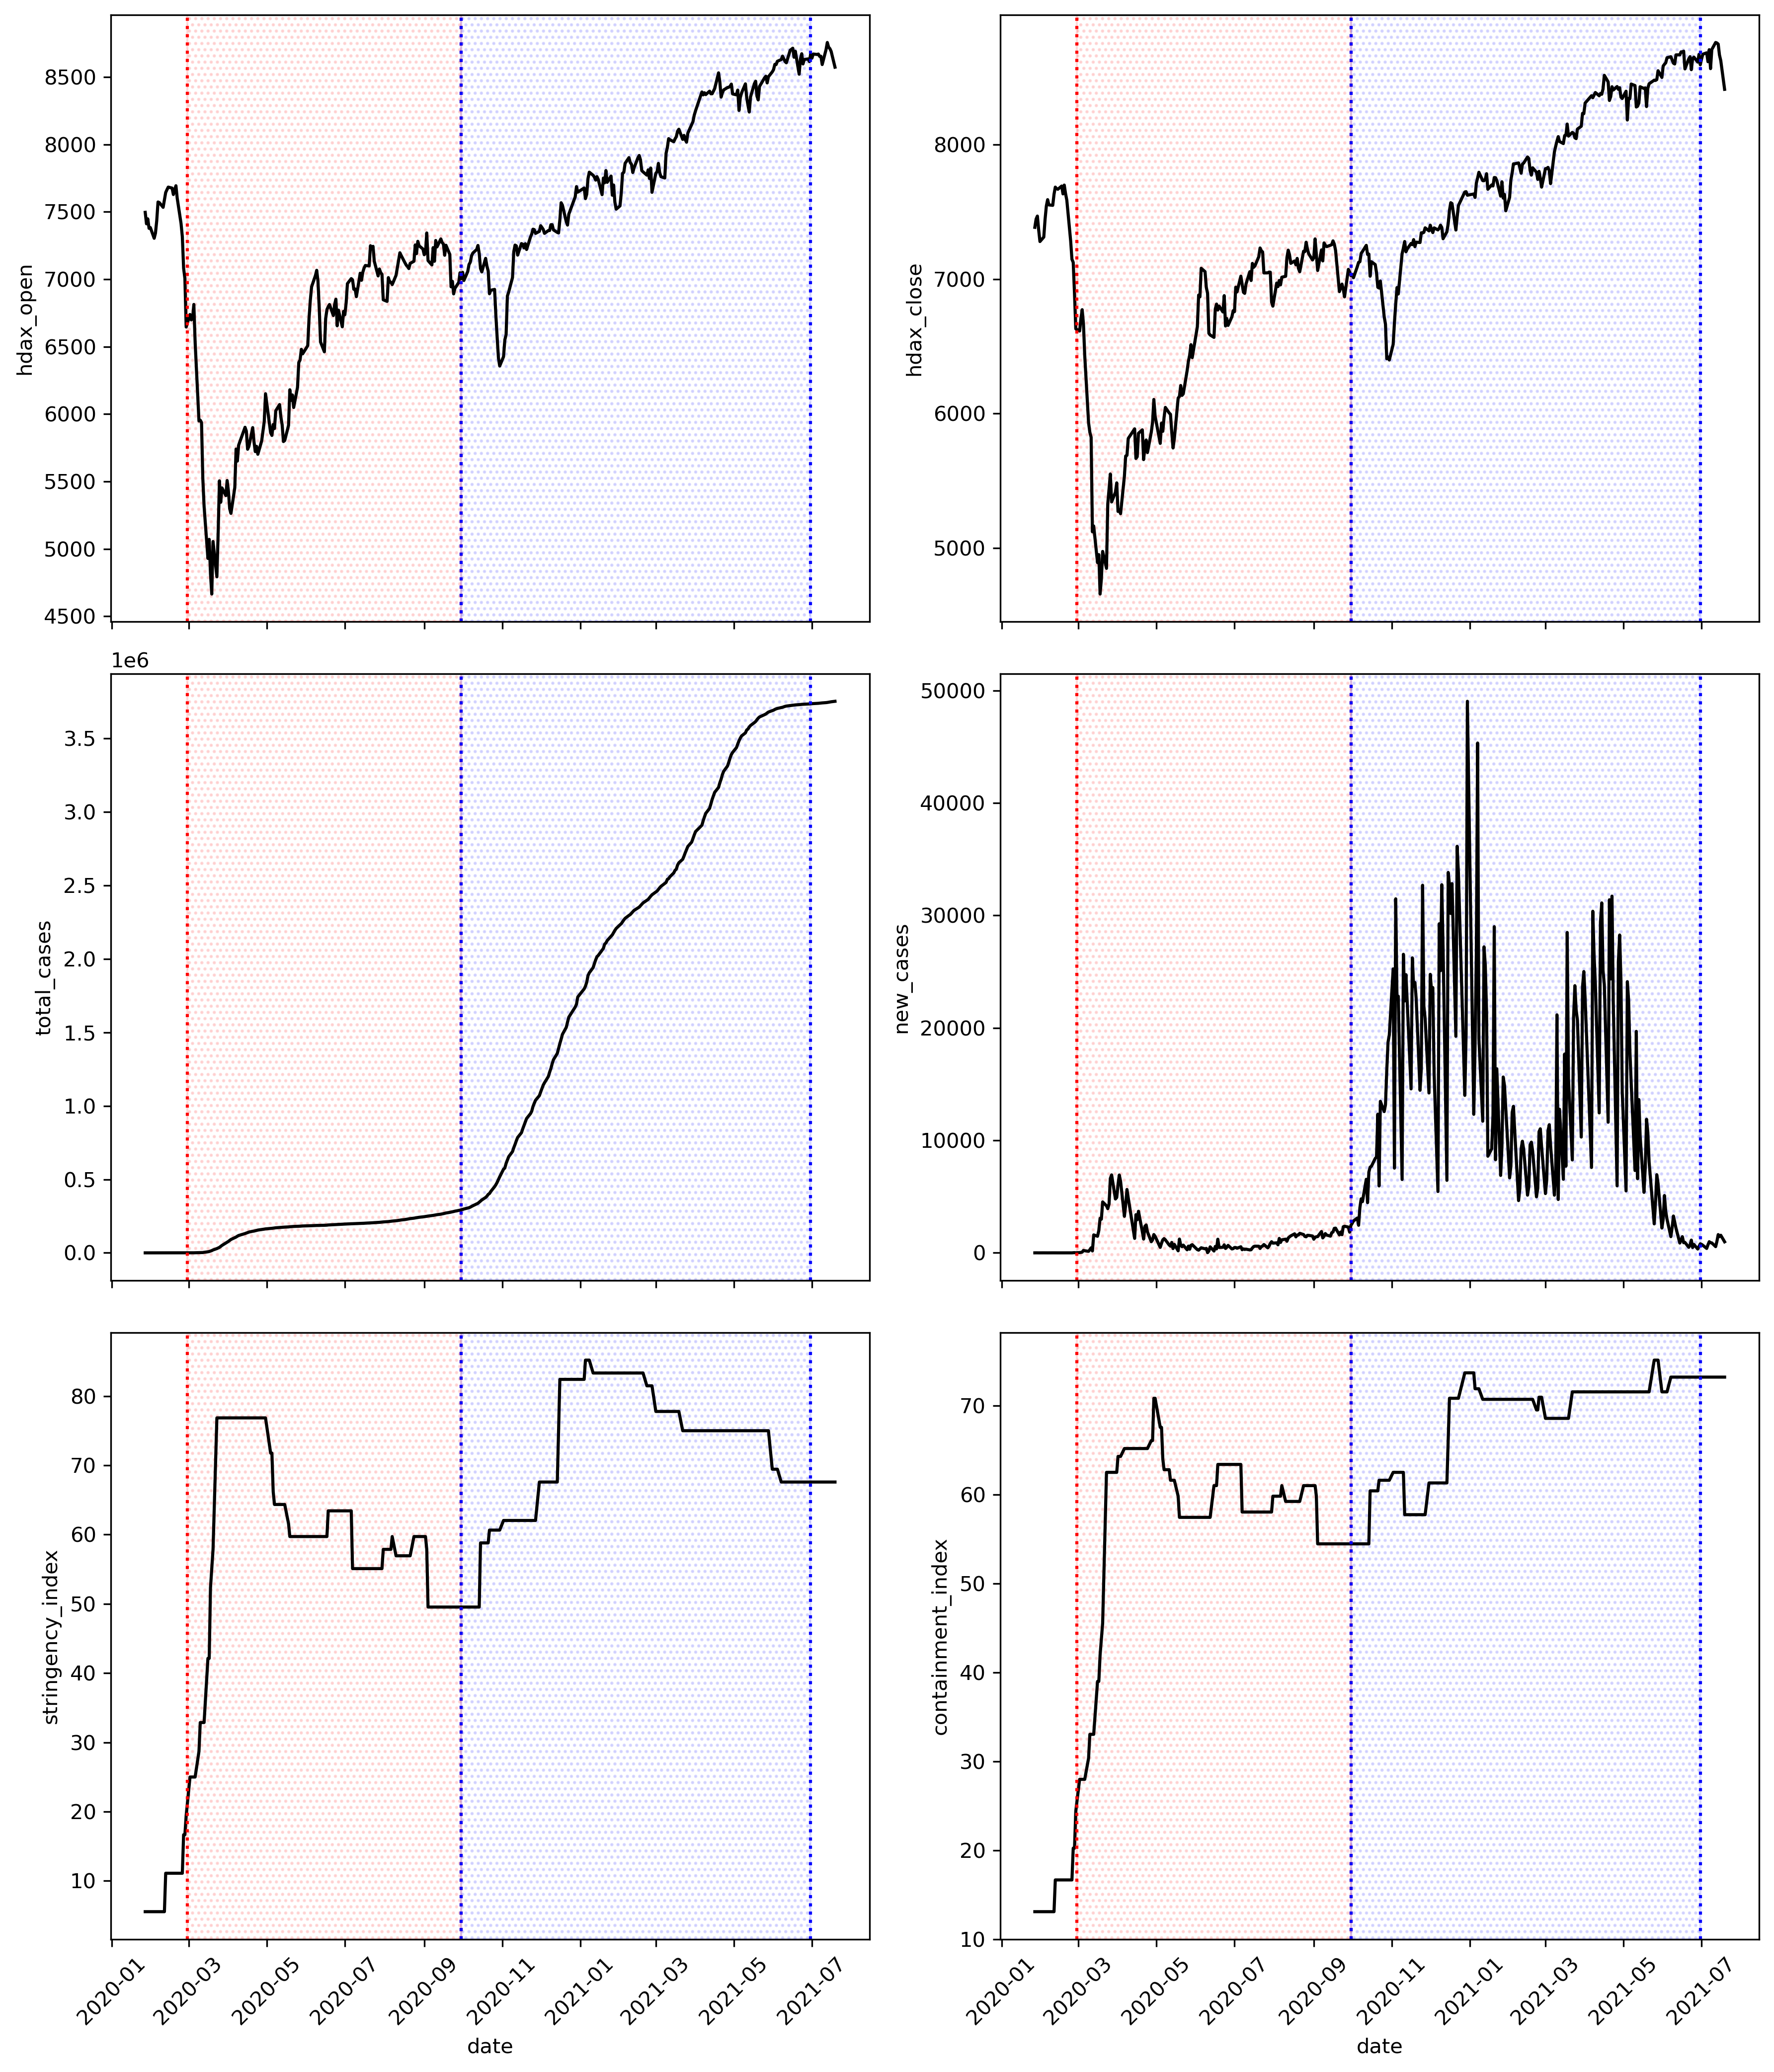

In [10]:
#plotting the different datapoints and highlighting the two sample areas

#saving sample dates in variables
sample_1_start = pd.to_datetime("2020-02-29")
sample_1_end = pd.to_datetime("2020-09-30")
sample_2_start = pd.to_datetime("2020-09-30")
sample_2_end = pd.to_datetime("2021-06-30")
fig, axes = plt.subplots(3, 2, tight_layout = True, figsize=(12,14), sharex=True, dpi=300)

#plotting and highlighting samples
for column, ax in zip(columns, axes.reshape(-1)):
    sns.lineplot(x=df.date, y=column, data=df, ax=ax, color="black")
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    # highlight the first wave sample
    ax.axvline(x = sample_1_start, color = 'red', ls=":")
    ax.axvline(x = sample_1_end, color = 'red', ls=":")
    ax.axvspan(sample_1_start, sample_1_end, alpha=0.15, color='red', hatch="....", fill=False)
    
    # highlight the second wave sample
    ax.axvline(x = sample_2_start, color = 'blue', ls=":")
    ax.axvline(x = sample_2_end, color = 'blue', ls=":")
    ax.axvspan(sample_2_start, sample_2_end, alpha=0.15, color='blue', hatch="....", fill=False)


## 8. Descriptive Statistics with two sub-samples

In [6]:
#generate descriptive statistics of first wave sub-sample
df_1 = df[(df["date"]<=sample_1_end) & (df["date"]>=sample_1_start)].copy(deep=True)
df_1.loc[:,"hdax_open":"containment_index"].describe()

,hdax_open,hdax_close,total_cases,new_cases,stringency_index,containment_index
count,149.00,149.00,149.00,149.00,149.00,149.00
mean,6508.45,6501.61,173326.71,1475.72,59.04,57.57
std,689.00,696.28,76792.77,1481.38,12.06,8.84
min,4665.29,4658.54,159.00,16.00,25.00,27.98
25%,5916.20,5886.36,154999.00,477.00,55.09,57.44
50%,6796.35,6776.30,189817.00,1155.00,59.72,59.23
75%,7075.73,7055.12,218508.00,1716.00,63.43,62.80
max,7342.81,7298.42,292913.00,6933.00,76.85,70.83


In [7]:
#generate descriptive statistics of second wave sub-sample
df_2 = df[(df["date"]<=sample_2_end) & (df["date"]>=sample_2_start)].copy(deep=True)
df_2.loc[:,"hdax_open":"containment_index"].describe()

,hdax_open,hdax_close,total_cases,new_cases,stringency_index,containment_index
count,189.00,189.00,189.00,189.00,189.00,189.00
mean,7823.49,7827.33,2209070.46,14249.91,72.22,67.85
std,574.86,570.92,1143073.69,10114.22,9.48,5.86
min,6356.41,6398.20,292913.00,341.00,49.54,54.46
25%,7365.52,7365.28,1157514.00,5961.00,67.59,62.50
50%,7793.56,7800.37,2346876.00,11881.00,75.00,70.71
75%,8375.03,8362.85,3276871.00,22593.00,81.48,71.55
max,8712.93,8694.16,3736205.00,49044.00,85.19,75.12


The descriptive statistics clearly show that the first and second waves are very different!

## 9. Saving both samples seperately for further statistical analysis

In [8]:
df_1.set_index("date", inplace=True, drop=True)
df_1.to_csv("prepared_data_sample_1.csv")
df_2.set_index("date", inplace=True, drop=True)
df_2.to_csv("prepared_data_sample_2.csv")